Recommender System using [Book Crossing Dataset](http://www2.informatik.uni-freiburg.de/~cziegler/BX/)

### Importing Usual Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

### Importing Dataset

In [2]:
book_data= pd.read_csv('BX-Books.csv', sep= ';', error_bad_lines= False, encoding= 'latin-1')
book_data.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
user_data= pd.read_csv('BX-Users.csv', sep= ';', error_bad_lines= False, encoding= 'latin-1')
user_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
rating_data= pd.read_csv('BX-Book-Ratings.csv', sep= ';', error_bad_lines= False, encoding= 'latin-1')
rating_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Data Preprocessing

At first, I'll investigate the tables to see if any improvement is needed. Then I will do necessary operations to make the data clean so that I can work better with them.

In [5]:
book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
user_data.columns= user_data.columns.str.strip().str.lower().str.replace('-', '_')
rating_data.columns= rating_data.columns.str.strip().str.lower().str.replace('-', '_')

In [6]:
pd.set_option('display.max_colwidth', -1)

In [7]:
print(book_data.dtypes)
print('-'*40)
print(book_data.isnull().sum())

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object
----------------------------------------
isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64


Let's take care of the missing value in 'book_author' column.

In [8]:
book_data.loc[(book_data['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


In [9]:
book_data.loc[(book_data['isbn'] == '9627982032'),'book_author'] = 'Other'

* Let's look at the unique years to realize the time period as this dataset was created in 2004. 

In [10]:
book_data['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

* We can see there are three string values in the 'year_of_publication' column. Let's check at the corresponding rows in the dataframe.

In [11]:
book_data[book_data['year_of_publication'] == 'DK Publishing Inc'] 


,isbn,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [12]:
book_data[book_data['year_of_publication'] == 'Gallimard']

,isbn,book_title,book_author,year_of_publication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


* Persumably there has been a shift in the values of this three rows. Let's bring them in the right place.

In [13]:
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [14]:
replace_df_value(book_data, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(book_data, 209538, 'year_of_publication', 2000)
replace_df_value(book_data, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data, 221678, 'book_author', 'James Buckley')
replace_df_value(book_data, 221678, 'year_of_publication', 2000)
replace_df_value(book_data, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data, 220731, 'year_of_publication', 2003)
replace_df_value(book_data, 220731, 'publisher', 'Gallimard')

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


* Let's check if the corrections are made properly.

In [15]:
book_data.loc[221678]

isbn                   0789466953                                                                                
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book_author            James Buckley                                                                             
year_of_publication    2000                                                                                      
publisher              DK Publishing Inc                                                                         
Name: 221678, dtype: object

* So the corrections are made. We've seen there are two missing values in the 'publisher' column. Let's take care of that.

In [16]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [17]:
book_data.loc[(book_data['isbn'] == '193169656X'),'publisher'] = 'No Mention'
book_data.loc[(book_data['isbn'] == '1931696993'),'publisher'] = 'No Mention'

**Let's investigate the user_rating dataset

In [18]:
print(user_data.shape)

(278858, 3)


In [19]:
user_data['user_id'].unique()

array([     1,      2,      3, ..., 278856, 278857, 278858])

* So user_id's alright. Let's check out the age of the users.

In [20]:
user_data['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [21]:
user_data.loc[(user_data['age'] > 90) | (user_data['age'] < 5)] = np.nan
user_data['age'].fillna((user_data['age'].mean()), inplace=True)
user_data['age']= user_data['age'].astype('int64')
user_data['age'].unique()

array([34, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75, 76, 83,
       68, 11, 77, 70,  8,  7, 81, 10,  5,  6, 84, 82, 90, 85, 86, 87, 89,
       88])

* We need to investigate out rating dataset too. 

In [22]:
rating_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


* I'll only take the ISBNs that also belongs to the main book_data set.

In [23]:
unique_ratings = rating_data[rating_data.isbn.isin(book_data.isbn)]

* Ratings dataset should have ratings from users which exist in users dataset, unless new users are added to users dataset

In [24]:
rating_data = rating_data[rating_data.user_id.isin(user_data.user_id)]

In [25]:
print(rating_data.shape)
print(unique_ratings.shape)
print(book_data.shape)
print(user_data.shape)

(1142978, 3)
(1031136, 3)
(271360, 5)
(278858, 3)


In [26]:
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

## Visualization

Lat's now make some pretty plots to visualize the data. 

The age distribution of the readers: 

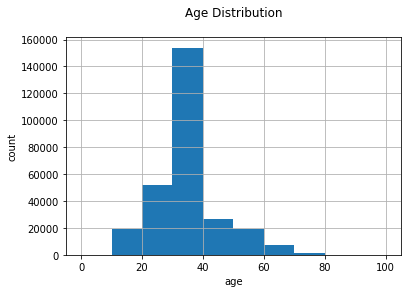

In [27]:
user_data.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution\n')
plt.xlabel('age')
plt.ylabel('count')
plt.savefig('age_dist.png', bbox_inches='tight')
plt.show()

Let's see which rating people tend to give more : 

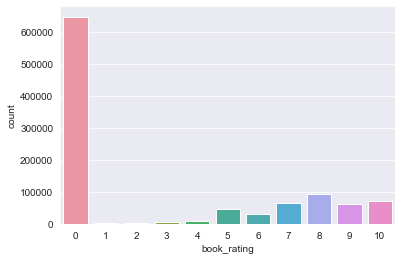

In [28]:
sns.set_style('darkgrid')
sns.countplot(data= unique_ratings , x='book_rating')
plt.show()

This countplot shows users have rated 0 the most, which can mean they haven't rated bokks at all. We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0.

In [29]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]

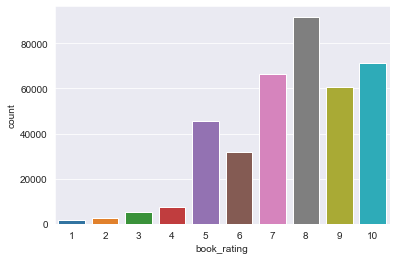

In [30]:
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='book_rating')
plt.show()

Now this countplot of bookRating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times.

It was shown earlier that some of the year_of_publication inputs are in string format and some are in integer. I will convert all of them to float now.

In [31]:

book_data.year_of_publication = pd.to_numeric(book_data.year_of_publication, errors='coerce')

# Check for 0's or NaNs in Year of Publication
zero_year = book_data[book_data.year_of_publication == 0].year_of_publication.count()
nan_year = book_data.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
book_data.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


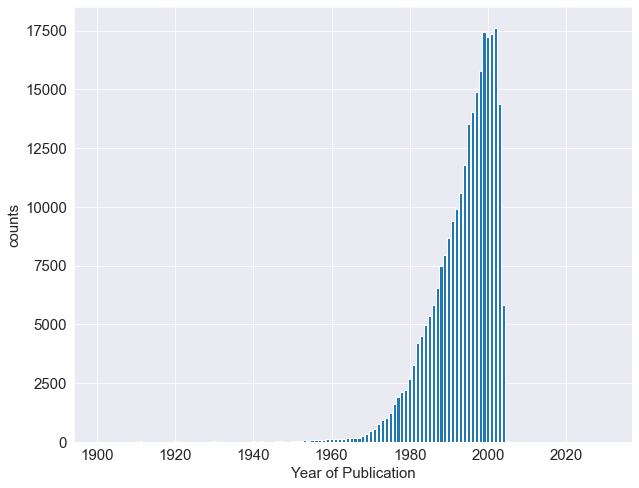

In [32]:
year = book_data.year_of_publication.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

So we can see publication years are somewhat between 1950 - 2005 here.

### Popularity Based Recommendation

Now let's try to build our first recommendation system based on popularity. This recommendations are usually given to every user irrespective of personal charecterization. 

In [33]:
ratings_explicit.head()

,user_id,isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [34]:
print(unique_ratings.shape)
print(ratings_explicit.shape)

(1031136, 3)
(383842, 3)


I'll only consider ISBNs that were explicitely rated for this recommendation system.

In [35]:
new_book_df= pd.merge(book_data, ratings_explicit, on='isbn')
new_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9


In [36]:
print(new_book_df.shape)

(383842, 7)


In [37]:
new_book_df['book_title'].nunique()

135567

In [38]:
top_ten_books= pd.DataFrame(new_book_df.groupby('book_title')['book_rating'].count()
                         .sort_values(ascending=False).head(10))

print('The top ten books recommendation : ')
top_ten_books

The top ten books recommendation : 


,book_rating
book_title,
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
The Red Tent (Bestselling Backlist),383
Bridget Jones's Diary,377
A Painted House,366
Life of Pi,336


So our 'All Time Favourite" book recommendations are ready.

### Memory-Based Collaborative Filtering

Memory-Based Collaborative Filtering are of two kinds: 
1. user-item filtering 
2. item-item filtering

A user-item filtering will take a particular user and find users that are similar to that user based on similarity of ratings. Then it will recommend items that are similar to the ones the users liked.

Unlike user-item filtering, item-item filtering will take an item, find users who liked that item, and find other items that those users or similar users also liked. It takes items and recommends other items.

* Item-Item Collaborative Filtering: “Users who liked this item also liked …”
* User-Item Collaborative Filtering: “Users who are similar to you also liked …”

### Train - Test Split

In [39]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(new_book_df, test_size=0.20)

In [40]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 307073
Testing set lengths: 76769
Test set is 20% of the full dataset.


In [41]:
# Get int mapping for user_id in train dataset

u_unique_train = train_data.user_id.unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset

i_unique_train = train_data.isbn.unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

# Get int mapping for user_id in test dataset

u_unique_test = test_data.user_id.unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in train dataset

i_unique_test = test_data.isbn.unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}


In [42]:
# TRAINING SET
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['isbn'].map(train_data_book2idx)

# TESTING SET
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['isbn'].map(test_data_book2idx)

# Convert back to 3-column df
train_data = train_data[['u_unique', 'i_unique', 'book_rating']]
test_data = test_data[['u_unique', 'i_unique', 'book_rating']]

In [43]:
train_data.sample(5)

,u_unique,i_unique,book_rating
132475,43945,10636,8
366377,41869,109321,8
2096,50003,19417,7
343798,7428,33961,9
34527,6340,6960,8


### User-Item Matrix for Train Data

At first I'll create an empty matrix of users * books and the will add the appropriate values to the matrix by extracting them from the dataset.

In [44]:
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():                  # entry[1] is the user-id, entry[2] is the book-isbn
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # -1 is to counter 0-based indexing

In [45]:
train_matrix.shape

(59790, 128730)

### User-Item Matrix for Test Data

In [46]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] 

In [47]:
test_matrix.shape

(25946, 47149)

### Cosine Similarity Based Recommendation System

As I am doing this calculations on my PC, so it is not a good idea to perform this huge calculation. So I'll perform on a subset initially. It will take a bit of time to calculate.

A distance metric commonly used in recommender systems is *cosine similarity*, where the ratings are seen as vectors in ``n``-dimensional space and the similarity is calculated based on the angle between these vectors. 
Cosine similiarity for users *a* and *b* can be calculated using the formula below, where you take dot product of  the user vector *$u_a$* and the user vector *$u_b$* and divide it by multiplication of the Euclidean lengths of the vectors.
<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(u_k,u_a)=\frac{u_k&space;\cdot&space;u_a&space;}{&space;\left&space;\|&space;u_k&space;\right&space;\|&space;\left&space;\|&space;u_a&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{a,m}x_{b,m}}{\sqrt{\sum&space;x_{a,m}^2\sum&space;x_{b,m}^2}}"/>

To calculate similarity between items *p* and *q* you use the formula:

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(i_m,i_b)=\frac{i_m&space;\cdot&space;i_b&space;}{&space;\left&space;\|&space;i_m&space;\right&space;\|&space;\left&space;\|&space;i_b&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{m,p}x_{m,q}}{\sqrt{\sum&space;x_{m,p}^2\sum&space;x_{m,q}^2}}
"/>

To make item-item similarity we need to take the transpose of the matrix.

In [48]:
train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine') 

Now I'll define a function to predict the similarity :

In [49]:
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [50]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

### Evaluation

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')


Item-based CF RMSE: 7.955064324052542
User-based CF RMSE: 7.954612889284469


* We see our recommendation system gives 7.93 RMSE score. I want to check if we can make any improvement in this score by using another method. For this I will use Single valu decomposition method from the Surprise library.

### SVD Based recommendation System

In [52]:
from surprise import Reader, Dataset

# Creating a 'Reader' object to set the limit of the ratings 

reader = Reader(rating_scale=(1, 10))

data = Dataset.load_from_df(ratings_explicit, reader)

In [53]:
from surprise import SVD, model_selection, accuracy

model = SVD()

# Train on books dataset

%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6323  1.6280  1.6360  1.6472  1.6395  1.6366  0.0065  
Fit time          20.77   20.66   20.78   20.58   20.85   20.73   0.09    
Test time         0.75    0.76    0.75    0.55    0.75    0.71    0.08    
CPU times: user 1min 52s, sys: 735 ms, total: 1min 53s
Wall time: 1min 53s


{'test_rmse': array([1.63225066, 1.62798498, 1.63597204, 1.64718589, 1.63953615]),
 'fit_time': (20.76631188392639,
  20.658851861953735,
  20.77569317817688,
  20.582356929779053,
  20.847140073776245),
 'test_time': (0.7479357719421387,
  0.7551770210266113,
  0.7467126846313477,
  0.5537259578704834,
  0.7549459934234619)}

### Train - Test Split

In [54]:
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

model = SVD()

model.fit(trainset)
predictions = model.test(testset)

accuracy.rmse(predictions)

RMSE: 1.6392


1.6391944496248727

We see the RMSE score has improved a lot. It is now on average 1.64 which is pretty good. 

### Testing Results !

Let's take an arbitrary user-id and item-id to test our model. 

In [55]:
uid = 276744  
iid = '038550120X' 
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.39   {'was_impossible': False}


In [56]:
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg= ratings_explicit[(ratings_explicit.user_id==pred.uid) & 
                             (ratings_explicit.isbn==pred.iid)].book_rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.39.

The real rating given for this was 7.00.


In [57]:
# The following function was adapted from the surprise docs
# and can be used to get the top book recommendations for each user.
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [58]:
pred = model.test(testset)
top_n = get_top_n(pred)

In [59]:
def get_reading_list(userid):
    """
    Retrieve full book titles from full 'books_users_ratings' dataframe
    """
    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = new_book_df.loc[new_book_df.isbn==book].book_title.unique()[0]
        reading_list[title] = rating
    return reading_list

In [60]:
# Just take a random look at user_id=60337
example_reading_list = get_reading_list(userid=116866)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

SHIPPING NEWS: 7.916242467154888
Death With Reservations (Pennyfoot Hotel Mystery Series , No 10): 7.90564173310596
Elementary Statistics: 7.818231185484617
Calculus: Early Transcendental Functions: 7.818231185484617
Statistics for Experimenters: An Introduction to Design, Data Analysis, and Model Building: 7.818231185484617
Does God Play Dice: The Mathematics of Chaos: 7.818231185484617
The Biosphere.: 7.818231185484617
Granta 52: Food : The Vital Stuff: 7.818231185484617
Applied Linear Statistical Models: Regression, Analysis of Variance, and Experimental Designs: 7.818231185484617
The Best of Creative Computing: 7.818231185484617


Avobe recommended books seems pretty much related. So my first recommender engine is finished. Though there are many scopes to make improvements. So I'll be working on this project time to time. 